In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as pl
from matplotlib.pyplot import *
from PIL import Image
import gc

In [49]:
max_dbz = np.load("./2019081818460000.npy")

In [50]:
max_dbz

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

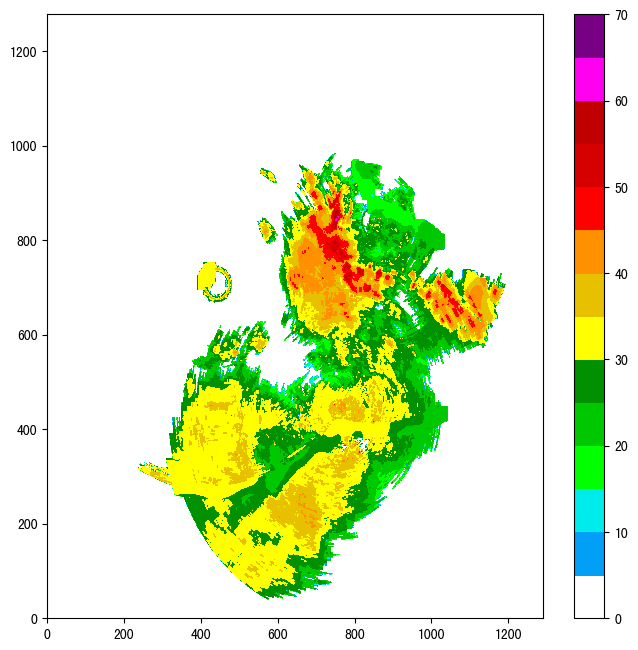

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,8),dpi=100)
colors = ['white', '#01a0f6', '#00ecec', '#01ff00','#00c800','#019000','#ffff00','#e7c000','#ff9000','#ff0000','#d60000','#c00000', '#ff00f0','#780084','#ad90f0']
levels = [0.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0, 55.0, 60.0, 65.0, 70.0]
plt.contourf(max_dbz,levels=levels,colors = colors)
plt.colorbar()
plt.show()

In [42]:
max_x_r = max_dbz["max_y"]
max_x_r.shape
import pandas as pd
pd.DataFrame(max_x_r).describe()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [54]:
def loadColorScheme(name):
    '''
    指定色标的名称，返回对应的色标和数值对
    :param name:
    :return:
    '''
#     if name == "ref":
#         colors = ['#484892', '#01a0f6', '#00ecec', '#01ff00', '#00c800', '#019000',
#                   '#ffff00', '#e7c000', '#ff9000', '#ff0000', '#d60000', '#c00000', '#ff00f0', '#780084', '#ad90f0']
#         levels = [0.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0,
#                   40.0, 45.0, 50.0, 55.0, 60.0, 65.0, 70.0]
    if name == "ref":
        colors = ['#484892', '#01a0f6', '#00ecec', '#01ff00', '#00c800', '#019000',
                  '#ffff00', '#e7c000', '#ff9000', '#ff0000', '#d60000', '#c00000', '#ffffff00', '#ffffff00']
        levels = [0.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0,
                  40.0, 45.0, 50.0, 55.0, 60.0, 65.0, 70.0]
    if name == "vel":
        colors = ['#79e3fd', '#05deff', '#04acad', '#0afd00', '#00c502', '#008100',
                  '#e3fff1', '#fbfbff', '#fc0000', '#ff5655', '#ffabbb', '#ff7d01', '#fbd301', '#fdff00']
        levels = [-27, -20, -15, -10, -5, -1, 0, 1, 5, 10, 15, 20, 27]

    if name == "wid":
        colors = ['#0000a0', '#0050c3', '#0069fd', '#00bafd', '#6ff8ff', '#1dff69', '#008c00',
                  '#236825', '#ffff97', '#fbe600', '#faaaa9', '#ff787a', '#ff3133', '#d20000', '#e600e6', '#960097']
        levels = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

    if name == "vel_single":
        colors = ["#00fffd", "#7ffffe", "#0080ff", "#360094", "#00fd89", "#00b702", "#038c00",
                  "#c7c1a3", "#ffffff", "#f08904", "#ffcb06", "#ffff00", "#ae0000", "#cd6e04", "#fa0001",
                  "#460147"]
        levels = [-50, -32, -27, -20, -15, -10, -5, -1, 0, 1, 5, 10, 15, 20, 27, 32, 50]

    return (colors, levels)

def figure_params():
    """
     basic config
     """
    # pl.rcParams['figure.subplot.bottom'] = 0
    # pl.rcParams['figure.subplot.top'] = 1
    # pl.rcParams['figure.subplot.left'] = 0
    # pl.rcParams['figure.subplot.right'] = 1     
    pl.switch_backend('agg')
    fig = pl.figure(figsize=(12, 12), frameon=False, facecolor='g')
    fig.patch.set_alpha(0.05)
    rect = [0, 0, 1.0, 1.0]
    ax = fig.add_axes(rect)
    fig.patch.set_alpha(0.5)
    return ax, fig

def plot2d_new_points(data2d, outname="", stype="ref"):
    '''
    绘制2d平面数据
    :param data2d:
    :return:
    '''

    if stype == "ref":
        colors, levels = loadColorScheme("ref")
        extend = 'max'
    if stype == "vel":
        colors, levels = loadColorScheme("vel")
        extend = 'both'
    if stype == "wid":
        colors, levels = loadColorScheme("wid")
        extend = "max"
    if stype == "vel_single":
        colors, levels = loadColorScheme("vel_single")
        extend = 'both'
    # print("levels=",levels)

    ax_single, fig_single = figure_params()

    ax_single.contourf(data2d, levels=levels, colors=colors, extend=extend)

    if not os.path.exists(os.path.dirname(outname)):
        os.makedirs(os.path.dirname(outname))
    fig_single.savefig(outname, transparent = True, dpi = 100)
#     pl.show()
    # pl.clf()
    pl.close(fig_single)
    del data2d
    gc.collect()
    print("----保存图片到", outname)


In [56]:
def plotMaxRef(volume_dbz, filename, outdir=r'./images'):
    '''
    从cappi的强度体扫数据中绘制x,y,z方向各自的组合最大回波强度
    提数据的纬度排列应该为高度、纬度、经度
    :return:
    '''
    print("---------------绘制x,y,z各自方向上的-----------")
    # 请李梓铭确认下数据的维度方位
#     max_x_r = max_dbz["max_x"]
#     max_y_r = max_dbz["max_y"]
#     max_z_r = max_dbz["max_z"]
    max_x_r = np.nanmax(volume_dbz,axis=2)
    max_y_r = np.nanmax(volume_dbz,axis=1)
    max_z_r = np.nanmax(volume_dbz,axis=0)

    # self._plot2d_DrawPic(max_x_r,self.productsdir,outname=outdir+os.sep+filename[:8]+os.sep+filename+"_lon.png")
    # self._plot2d_DrawPic(max_y_r,self.productsdir,outname=outdir+os.sep+filename[:8]+os.sep+filename+"_lat.png")
#     productsdir = os.path.join(dataPath(filename).ProductDir, 'Max_dbz')
    plot2d_new_points(max_x_r, outdir + os.sep + filename[:8] + os.sep + filename + "_lon.png")
    plot2d_new_points(max_y_r, outdir + os.sep + filename[:8] + os.sep + filename + "_lat.png")

    lsdir = outdir + os.sep + filename[:8]
    outname = lsdir + os.sep + filename + "_hgt.png"
    # self._plot2d_DrawPic(max_z_r,lsdir,outname=outname)
    plot2d_new_points(max_z_r, outname=outname)
    img = Image.open(outname)
    if img.size[0] > 150 or img.size[1] > 150:
        newWidth = 150
        newHeight = 150
        img.thumbnail((newWidth, newHeight), Image.ANTIALIAS)
    name = lsdir + os.sep + "short_" + filename + "_hgt.png"
    img.save(name)

    max_x_r = None
    max_y_r = None
    max_z_r = None

    return 1

In [57]:
max_dbz = np.load("./2019081818460000nradar.npz")
volume_dbz = max_dbz['arr_0']

filename = "2019081818460000"
plotMaxRef(max_dbz, filename, outdir=r'.\images')

---------------绘制x,y,z各自方向上的-----------


KeyError: '0 is not a file in the archive'

In [1]:
a = 2.0
isinstance(a,int)

False

In [7]:
import numpy as np
np.array(np.arange(0, 10, 0.2)) % 1

array([0. , 0.2, 0.4, 0.6, 0.8, 0. , 0.2, 0.4, 0.6, 0.8, 0. , 0.2, 0.4,
       0.6, 0.8, 0. , 0.2, 0.4, 0.6, 0.8, 0. , 0.2, 0.4, 0.6, 0.8, 0. ,
       0.2, 0.4, 0.6, 0.8, 0. , 0.2, 0.4, 0.6, 0.8, 0. , 0.2, 0.4, 0.6,
       0.8, 0. , 0.2, 0.4, 0.6, 0.8, 0. , 0.2, 0.4, 0.6, 0.8])

In [35]:
pl.switch_backend('WX')
pl.get_backend()

'WX'

In [ ]:
class RadarDisplay():
	def __init__(self):


		pass


	def _plotMaxRef(self,volume_dbz,filename, outdir = 'Fused_test'):
		'''
		从cappi的强度体扫数据中绘制x,y,z方向各自的组合最大回波强度
		提数据的纬度排列应该为高度、纬度、经度
		:return:
		'''
		print("---------------绘制x,y,z各自方向上的-----------")
		#请李梓铭确认下数据的维度方位
		max_x_r = np.nanmax(volume_dbz,axis=2)
		max_y_r = np.nanmax(volume_dbz,axis=1)
		max_z_r = np.nanmax(volume_dbz,axis=0)

		# self._plot2d_DrawPic(max_x_r,self.productsdir,outname=outdir+os.sep+filename[:8]+os.sep+filename+"_lon.png")
		# self._plot2d_DrawPic(max_y_r,self.productsdir,outname=outdir+os.sep+filename[:8]+os.sep+filename+"_lat.png")
		productsdir = os.path.join(dataPath(filename).ProductDir, 'Max_dbz')
		self._plot2d_new_points(max_x_r,outname=productsdir+os.sep+outdir+os.sep+filename[:8]+os.sep+filename+"_lon.png")
		self._plot2d_new_points(max_y_r,outname=productsdir+os.sep+outdir+os.sep+filename[:8]+os.sep+filename+"_lat.png")


		lsdir = productsdir+os.sep+outdir+os.sep+filename[:8]
		outname = lsdir+os.sep+filename +"_hgt.png"
		# self._plot2d_DrawPic(max_z_r,lsdir,outname=outname)
		self._plot2d_new_points(max_z_r,outname=outname)
		img = Image.open(outname)
		if img.size[0] > 150 or img.size[1] > 150:
			newWidth = 150
			newHeight = 150
			img.thumbnail((newWidth,newHeight),Image.ANTIALIAS)
		name = 	lsdir+os.sep+"short_"+filename+"_hgt.png"
		img.save(name)

		max_x_r = None
		max_y_r = None
		max_z_r = None

		return 1

	def _plotMaxRef_new(self,volume_dbz,filename, outdir = 'max_r_001',radar_id="radar_01"):
		print("---------------绘制x,y,z各自方向上的-----------g")
		#请李梓铭确认下数据的维度方位
		volume_dbz[volume_dbz>=100] = -100
		# volume_dbz[volume_dbz < 0.1] = -100
		# max_x_r = np.nanmax(volume_dbz,axis=2)
		max_z_r = np.nanmax(volume_dbz,axis=0)  # .T
		# self._plot2d_DrawPic(max_z_r,const_value.Product_Max_dbz,outname=os.path.join(radar_id, filename[:8]  ,'{}_max_z.png'.format(filename)))
		self._plot2d_new_points(max_z_r, outname=os.path.join(dataPath(filename).Product_Max_dbz, radar_id, filename[:8]  ,'{}_max_z.png'.format(filename)))

		# self._plot2d_new(max_z_r,outname=self.productsdir+os.sep+outdir+os.sep+filename+"_max_z.png")
		max_z_r = None
		return 1


	def _plot2d(self,data2d,outname=""):
		'''
		绘制2d平面数据
		:param data2d:
		:return:
		'''
		colors,levels = self._loadColorScheme("ref")
		ax_2d, fig_2d = self.figure_params()
		# ax.contourf(np.transpose(data2d),levels=levels,colors=colors,extend="max")
		ax_2d.contourf(data2d,levels=levels,colors=colors,extend="max")

		if not os.path.exists(os.path.dirname(outname)):
			os.makedirs(os.path.dirname(outname))

		fig_2d.savefig(outname, dpi=100, transparent=True)  #, dpi=200
		# pl.clf()
		pl.close(fig_2d)
		del data2d
		gc.collect()
		print("----保存图片到",outname)

	def _plot2d_new(self,data2d,data_type,outname="",stype="ref"):
		'''
		绘制2d平面数据
		:param data2d:
		:return:
		'''

		if stype == "ref":
			colors,levels = self._loadColorScheme("ref")
			extend = 'max'
		if stype == "vel":
			colors,levels = self._loadColorScheme("vel")
			extend = 'both'
		if stype == "vel_single":
			colors,levels = self._loadColorScheme("vel_single")
			extend = 'both'
		# print("levels=",levels)

		ax_2dn, fig_2dn = self.figure_params()
		#fig_2dn.patch.set_alpha(0.25)
		type_list = ['hgt','lat','lon']
		type_list.remove(data_type)
		print(type_list)
		coor_x = type_list[-1]
		coor_y = type_list[0]
		#print("___________",data_type)
		ax_2dn.contourf(data2d[coor_x].data,data2d[coor_y].data,
			data2d.data.squeeze(),levels=levels,colors=colors,extend=extend)
		# ax.set_xticks.
		# pl.xticks(color= "w")
		# ax.spines["left"].set_color("w")
		# pl.axes(axisbg='w')
		if not os.path.exists(os.path.dirname(outname)):
			os.makedirs(os.path.dirname(outname))
		if data_type == "lat" or data_type == "lon":
			transparent = False
			print("la")
		else:
			transparent = True
	
		fig_2dn.savefig(outname, dpi=100, transparent=transparent)  # True  touming
		# pl.clf()
		pl.close(fig_2dn)
		del data2d
		gc.collect()
		print("----保存图片到",outname)

	def _plot2d_DrawPic(self,data2d,const_path,outname="",stype="ref"):
		'''
		绘制2d平面数据
		:param data2d:
		:return:
		'''
		if stype == "ref":
			colors,levels = self._loadColorScheme("ref")
			extend = 'max'
		if stype == "vel":
			colors,levels = self._loadColorScheme("vel")
			extend = 'both'
		if stype == "vel_single":
			colors,levels = self._loadColorScheme("vel_single")
			extend = 'both'
		# print("levels=",levels)

		ax_dp, fig_dp = self.figure_params()

		ax_dp.contourf(data2d, levels=levels, colors=colors, extend=extend)

		outname = os.path.join(const_path,outname)

		if not os.path.exists(os.path.dirname(outname)):
			print(os.path.dirname(outname))
			os.makedirs(os.path.dirname(outname))
		fig_dp.savefig(outname, dpi=100, transparent=True)  #, dpi=200, transparent=True
		# pl.clf()
		pl.close(fig_dp)
		del data2d
		gc.collect()
		print("----保存图片到",outname)

	def _plot2d_new_points(self,data2d,outname="",stype="ref"):
		'''
		绘制2d平面数据
		:param data2d:
		:return:
		'''

		if stype == "ref":
			colors,levels = self._loadColorScheme("ref")
			extend = 'max'
		if stype == "vel":
			colors,levels = self._loadColorScheme("vel")
			extend = 'both'
		if stype == "wid":
			colors,levels = self._loadColorScheme("wid")
			extend = "max"
		if stype == "vel_single":
			colors,levels = self._loadColorScheme("vel_single")
			extend = 'both'
		# print("levels=",levels)

		ax_single, fig_single = self.figure_params()

		ax_single.contourf(data2d,levels=levels,colors=colors,extend=extend)

		if not os.path.exists(os.path.dirname(outname)):
			os.makedirs(os.path.dirname(outname))
		fig_single.savefig(outname, dpi=100, transparent=True)
		# pl.clf()
		pl.close(fig_single)
		del data2d
		gc.collect()
		print("----保存图片到",outname)

	def _plot2dproducts(self,data2d, levels, extend='max', outname="",figsize0=None,figsize1=None,stype="ref"):
		'''
		绘制2d平面数据
		:param data2d:
		:return:
		'''
		if figsize0 == None:
			figsize=(12, 12)
		else:
			figsize = (figsize0,figsize1)

		pl.switch_backend('agg')
		fig_pro = pl.figure(figsize=figsize, frameon=False)   #, facecolor='g')
		rect_q = [0, 0, 1.0, 1.0]
		ax_pro = fig_pro.add_axes(rect_q)
		if stype == 'etop':
			colors = ['#46468e','#01a0f6','#00ecec','#a3e5e5','#01ff00','#00c800','#019000','#055d04','#ffff00','#e7c000','#ff9000','#965705',\
			'#ff0000','#d60000','#c00000','#890404','#f38ded','#ff00f0','#780084','#ad90f0']
		elif stype == 'rain':
			colors = ['#92f6fe','#23b7ff','#0078b4','#0052ca','#0011dc','#bb6ffe','#7100b6','#50007f']
		elif stype == 'ref':
			colors = ['#484892', '#01a0f6','#00ecec', '#01ff00','#00c800','#019000',  '#ffff00', '#e7c000', '#ff9000', '#ff0000','#d60000','#c00000' ,'#ff00f0' , '#780084','#ad90f0']
		elif stype == "vel":
			colors = ['#79e3fd','#05deff','#04acad','#0afd00','#00c502','#008100','#e3fff1','#fbfbff','#fc0000','#ff5655','#ffabbb','#ff7d01','#fbd301','#fdff00']
		elif stype == 'ws':
			colors =  ['yellowgreen','yellow','orange','red']

		ax_pro.contourf(data2d,levels=levels,colors=colors,extend=extend)

		if not os.path.exists(os.path.dirname(outname)):
			os.makedirs(os.path.dirname(outname))

		fig_pro.savefig(outname,  transparent=True)
		pl.close(fig_pro)
		del data2d
		gc.collect()
		print("----保存图片到",outname)

	def _plot2d_second(self,data2d,outname="",stype="ref",figsize0=None,figsize1=None):
		'''
		绘制2d平面数据
		:param data2d:
		:return:
		'''
		if stype == "ref":
			colors,levels = self._loadColorScheme("ref")
			extend = 'max'
		if stype == "vel":
			colors,levels = self._loadColorScheme("vel")
			extend = 'both'
		if stype == "vel_single":
			colors,levels = self._loadColorScheme("vel_single")
			extend = 'both'
		# print(levels)
		if figsize0 == None:
			figsize=(12, 12)
		else:
			figsize = (figsize0,figsize1)
		pl.switch_backend('agg')
		fig_2dnp = pl.figure(figsize=figsize, frameon=False, facecolor='g')
		rect_q = [0, 0, 1.0, 1.0]
		ax_2dnp = fig_2dnp.add_axes(rect_q)

		ax_2dnp.contourf(data2d,levels=levels,colors=colors,extend=extend)

		if not os.path.exists(os.path.dirname(outname)):
			os.makedirs(os.path.dirname(outname))
		fig_2dnp.savefig(outname,  transparent=True)  #dpi=200,
		# pl.clf()
		pl.close(fig_2dnp)
		del data2d
		gc.collect()
		print("----保存图片到",outname)




	def _plotheight2d(self,data2d,outname=""):
		'''
		绘制2d平面数据
		:param data2d:
		:return:
		'''
		colors,levels = self._loadColorScheme("ref")
		ax_h, fig_h = self.figure_params()
		ax_h.contourf(data2d,levels=levels,colors=colors,extend="max")
		if not os.path.exists(os.path.dirname(outname)):
			os.makedirs(os.path.dirname(outname))
		fig_h.savefig(outname, dpi=100, transparent=True)
		# pl.clf()
		pl.close(fig_h)
		del data2d
		gc.collect()


	def _plotQuiver2d(self, uwind, vwind, wwind, outname='', color_positive = 'r', color_negative = 'g', plane_type = 'z', grid_step=None, figsize0=None,figsize1=None):
		pass
		'''
		绘制二位风场数据
		'''
		if figsize0 == None:
			figsize=(12, 12)
		else:
			figsize = (figsize0,figsize1)
		fig_quiv = pl.figure(figsize=figsize, frameon=False, facecolor='g')
		rect_q = [0, 0, 1.0, 1.0]
		ax_quiv = fig_quiv.add_axes(rect_q)

		if grid_step is None:
			grid_step = 20

		if plane_type == "z":

			size = uwind.shape
			xx = np.arange(size[1])
			yy = np.arange(size[0])
			ax_quiv.barbs(xx[::grid_step],yy[::grid_step],uwind[::grid_step,::grid_step],vwind[::grid_step,::grid_step],length=5, barbcolor='k', flagcolor='r', linewidth=1,sizes=dict(emptybarb=0.0,spacing=0.20),barb_increments=dict(half=2,full=4,flag=20))
		elif plane_type == "x":
			size = wwind.shape
			xx = np.arange(size[1])
			yy = np.arange(size[0])
			ax_quiv.barbs(xx[::grid_step],yy[::grid_step],vwind[::grid_step,::grid_step],5*wwind[::grid_step,::grid_step],length=5, barbcolor='k', flagcolor='r', linewidth=1,sizes=dict(emptybarb=0.0,spacing=0.20),barb_increments=dict(half=2,full=4,flag=20))
		else:
			size = wwind.shape
			xx = np.arange(size[1])
			yy = np.arange(size[0])
			ax_quiv.barbs(xx[::grid_step],yy[::grid_step],uwind[::grid_step,::grid_step],5*wwind[::grid_step,::grid_step],length=5, barbcolor='k', flagcolor='r', linewidth=1,sizes=dict(emptybarb=0.0,spacing=0.20),barb_increments=dict(half=2,full=4,flag=20))


		ax_quiv.set_xlim(0,size[1])   # pl.xlim(0,size[1])
		ax_quiv.set_ylim(0,size[0])   # pl.ylim(0,size[0])

		print("save png to ",outname)
		if not os.path.exists(os.path.dirname(outname)):
			os.makedirs(os.path.dirname(outname))
		fig_quiv.savefig(outname, transparent=True)  # True   dpi=200,
		pl.close(fig_quiv)
		del uwind
		del vwind
		del wwind
		gc.collect()



	def _plotDivergence2d(self, divergence_data, outname=''):
		pass
		'''
		绘制散度
		'''
		ax_div, fig_div = self.figure_params()
		print("-----------------div   or  vol -------------")
		min_divergence = np.nanmin(divergence_data)
		max_divergence = np.nanmax(divergence_data)
		levels = np.linspace(min_divergence, 0, 10).tolist()[:-1] + np.linspace(0, max_divergence,10).tolist()
		# 19
		cmap = pl.cm.seismic


		cs = ax_div.contour(divergence_data, levels, cmap=cmap)
		pl.clabel(cs, fontsize=9, inline=1)
		if not os.path.exists(os.path.dirname(outname)):
			os.makedirs(os.path.dirname(outname))
		fig_div.savefig(outname, dpi=100, transparent=True)
		# pl.clf()
		pl.close(fig_div)
		del divergence_data
		gc.collect()


	def _loadColorScheme(self,name):
		'''
		指定色标的名称，返回对应的色标和数值对
		:param name:
		:return:
		'''
		if name == "ref":
			colors = ['#484892', '#01a0f6', '#00ecec', '#01ff00','#00c800','#019000',
                      '#ffff00','#e7c000','#ff9000','#ff0000','#d60000','#c00000', '#ff00f0','#780084','#ad90f0']
			levels = [0.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, \
                                       40.0, 45.0, 50.0, 55.0, 60.0, 65.0, 70.0]
		if name == "vel":
			colors = ['#79e3fd','#05deff','#04acad','#0afd00','#00c502','#008100',
                      '#e3fff1','#fbfbff','#fc0000','#ff5655','#ffabbb','#ff7d01','#fbd301','#fdff00']
			levels = [-27,-20,-15,-10,-5,-1,0,1,5,10,15,20,27]

		if name == "wid":
			colors = ['#0000a0','#0050c3','#0069fd','#00bafd','#6ff8ff','#1dff69','#008c00',
                      '#236825','#ffff97','#fbe600','#faaaa9','#ff787a','#ff3133','#d20000','#e600e6','#960097']
			levels =  [0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,6.0,7.0,8.0,9.0,10.0]

		if name == "vel_single":
			colors = ["#00fffd", "#7ffffe", "#0080ff", "#360094", "#00fd89", "#00b702", "#038c00", \
			"#c7c1a3", "#ffffff", "#f08904", "#ffcb06", "#ffff00", "#ae0000", "#cd6e04", "#fa0001", \
			 "#460147"]
			levels =  [-50, -32, -27, -20, -15, -10, -5, -1, 0, 1, 5, 10, 15, 20, 27, 32, 50]

		return (colors,levels)

	def figure_params(self):
		"""
		 basic config
		 """
		# pl.rcParams['figure.subplot.bottom'] = 0
		# pl.rcParams['figure.subplot.top'] = 1
		# pl.rcParams['figure.subplot.left'] = 0
		# pl.rcParams['figure.subplot.right'] = 1
		pl.switch_backend('agg')
		fig = pl.figure(figsize=(12, 12), frameon=False, facecolor='g')
		fig.patch.set_alpha(0.05)
		rect = [0, 0, 1.0, 1.0]
		ax = fig.add_axes(rect)
		fig.patch.set_alpha(0.5)
		return ax,fig
